## Nama : Alisha Zahra Saadiya
## NIM : 2501971742
## Link Video : https://binusianorg-my.sharepoint.com/personal/alisha_saadiya_binus_ac_id/_layouts/15/guestaccess.aspx?share=ESzraNsI4D9MrN4DII5e5dsBxQum693OeeZwwwiRKEL5sA&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=PTnwym

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import unicodedata
import unidecode
import re
import nltk
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import gensim
from gensim import corpora, models
from gensim.models import LsiModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
import pyLDAvis
import pyLDAvis.gensim
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

Unnamed: 0  index                                                URL  \
0           0   1412  https://twitter.com/oksihen/status/16584282698...   
1           1  23337  https://twitter.com/reixyynx/status/1655911656...   
2           2  23099  https://twitter.com/sheyappe/status/1655924302...   
3           3   5691  https://twitter.com/tfouive/status/16575732480...   
4           4  16823  https://twitter.com/itshaeyoz/status/165648391...   

                        Date  \
0  2023-05-16 11:04:46+00:00   
1  2023-05-09 12:24:38+00:00   
2  2023-05-09 13:14:54+00:00   
3  2023-05-14 02:27:13+00:00   
4  2023-05-11 02:18:35+00:00   

                                               Tweet                   ID  \
0  @__nsch @bankbsi_id @Bittersweutz kak mendinga...  1658428269849608192   
1  @Adelyaaav @med_faqih08 @bankbsi_id sore ini p...  1655911656407580672   
2  @SeokjinRie @bankbsi_id dih ternyata transfer ...  1655924302917804033   
3  @bankbsi_id kalo ambil duitnya langsung ke ban...  1657573248035586048   
4  @bankbsi_id min ayo dong kasi tau info ke nasa...  1656483914373005312   

    Username  Replies  Reetweets  Likes  Quotes       conversationId Language  \
0    oksihen        1          0      0       0  1655777758180708355       in   
1   reixyynx        0          0      0       0  1655781242166710273       in   
2   sheyappe        1          0      0       0  1655909697399177217       in   
3    tfouive        1          0      0       0  1657346196548239360       in   
4  itshaeyoz        1          0      2       0  1655777758180708355       in   

  Links Media  Retweeted Tweet  Bookmarks  
0   NaN   NaN              NaN          0  
1   NaN   NaN              NaN          0  
2   NaN   NaN              NaN          0  
3   NaN   NaN              NaN          0  
4   NaN   NaN              NaN          0

In [ ]:
# Identifikasi kolom yang akan dihapus (indeks mulai dari 0)
colomn_drop = list(range(0, 4)) + list(range(5, 17))

# Hapus kolom yang dipilih
df_tweet = df.drop(df.columns[colomn_drop], axis=1)
df_tweet

Tweet
0     @__nsch @bankbsi_id @Bittersweutz kak mendinga...
1     @Adelyaaav @med_faqih08 @bankbsi_id sore ini p...
2     @SeokjinRie @bankbsi_id dih ternyata transfer ...
3     @bankbsi_id kalo ambil duitnya langsung ke ban...
4     @bankbsi_id min ayo dong kasi tau info ke nasa...
...                                                 ...
6096  @ratnamuninggarr @bankbsi_id ka, setauku juga ...
6097  @bankbsi_id @fadlysuardhana 3x24 jam keterlalu...
6098      @OposisiCerdas Mau indonesia seperti bank BSI
6099  @bankbsi_id @ngebacot_bae Ga bisa di akses woo...
6100  Perkembangan pembangunan ruangan UKS adik2 san...

[6101 rows x 1 columns]

### Cleaning

In [ ]:
def cleaning(df):
    # Mengubah teks menjadi huruf kecil
    tweet_clean = [i.lower() for i in df]

    # Menghapus URLs
    tweet_clean = [re.sub(r'http\S+|www\S+|https\S+', '', i) for i in tweet_clean]

    # Menghapus tag
    tweet_clean = [re.sub(r'@\w+', ' ', i) for i in tweet_clean]

    # Menghapus simbol (karakter khusus)
    tweet_clean = [re.sub(r'[^\w\s]', ' ', i) for i in tweet_clean]

    # Menghapus angka
    tweet_clean = [re.sub(r'\d+', '', i) for i in tweet_clean]

    # Menghapus karakter yang tidak sesuai
    tweet_clean = [unicodedata.normalize('NFKD', i).encode('ascii', 'ignore').decode('utf-8', 'ignore') for i in tweet_clean]

    # Menghapus pola khusus seperti "___"
    tweet_clean = [re.sub(r'_{2,}', ' ', i) for i in tweet_clean]

    # Menghapus spasi berlebih
    tweet_clean = [re.sub(r'\s+', ' ', i) for i in tweet_clean]

    # Menghapus spasi di depan dan di belakang
    tweet_clean = [i.strip() for i in tweet_clean]

    return tweet_clean

In [ ]:
df_tweet['Tweet_Clean']=cleaning(df_tweet['Tweet'])
df_tweet.head()

Tweet  \
0  @__nsch @bankbsi_id @Bittersweutz kak mendinga...   
1  @Adelyaaav @med_faqih08 @bankbsi_id sore ini p...   
2  @SeokjinRie @bankbsi_id dih ternyata transfer ...   
3  @bankbsi_id kalo ambil duitnya langsung ke ban...   
4  @bankbsi_id min ayo dong kasi tau info ke nasa...   

                                         Tweet_Clean  
0           kak mendingan hubungi aja call centernya  
1                                  sore ini pun sama  
2  dih ternyata transfer ke bank lain masih belum...  
3  kalo ambil duitnya langsung ke bank bisa ga si...  
4  min ayo dong kasi tau info ke nasabahnya udh s...

In [ ]:
df_tweet.to_csv('data2_cleaning.csv')

In [ ]:
x_train, x_test= train_test_split(df_tweet['Tweet_Clean'],test_size = 0.2, random_state = 42)

In [ ]:
x_train

3921    kalau topup ewallet setauku emang belum bisa k...
2107    hari ke may jam wib bsi bekasi masih error ast...
485     kan emang bank kalau transaksi ada otp dan pas...
4154    mau nanya min ibu saya melakukan transaksi mel...
452     sudah bisa sekarang atmnya kak mulai beroperas...
                              ...                        
3772    kalau saya baru bulan ini dan ini adalah reken...
5191    ini tadi sudah bisa lagii bener bgt emg kudu d...
5226    itu catatan mutasinya apa bg coba d liatin bia...
5390                     ah yg bener ah sebel bgt loh gua
860                     mbanking nya masih belum bisa min
Name: Tweet_Clean, Length: 4880, dtype: object

In [ ]:
x_test

2794    tadi saya tlp cs mending kalo udh bisa tarik d...
2592    gimana mau sehat uang semuanya ada di rekening...
5356                             bsi bank sabar indonesia
2002    aku udah bisa narik alhamdulillah di atm terak...
4205                  td sdh aku tarik lewat mandiri huhu
                              ...                        
2929    itu mutasinya april sebelum rame kasus ransomw...
734     udah hari layanan mobile banking belum dapat b...
1971    itu kalau infrastruktur it nya udah bagus ini ...
1168      thanks infonya sungguh meresahkan bank satu ini
5382    sesuai syariah segala sesuatunya dipertanggung...
Name: Tweet_Clean, Length: 1221, dtype: object

### Tokenization

Tahapan tokenization :    
- Membersihkan teks dari spasi tambahan
- Mengonversi karakter non-ASCII menjadi ASCII, misalnya karakter é akan diubah menjadi e
- Membagi teks menjadi token (kata-kata) yang siap digunakan untuk pemrosesan lanjutan

In [ ]:
x_train_stripped = [sample.strip() for sample in x_train]

x_train_unidecoded = [unidecode.unidecode(sample) for sample in x_train_stripped]

x_train_tokenized = [word_tokenize(sample) for sample in x_train_unidecoded]


In [ ]:
x_train_tokenized

[['kalau',
  'topup',
  'ewallet',
  'setauku',
  'emang',
  'belum',
  'bisa',
  'kak',
  'bisanya',
  'emoney',
  'saranku',
  'kalau',
  'akses',
  'mbanking',
  'jangan',
  'pake',
  'wifi',
  'kak'],
 ['hari',
  'ke',
  'may',
  'jam',
  'wib',
  'bsi',
  'bekasi',
  'masih',
  'error',
  'astaghfirullah'],
 ['kan',
  'emang',
  'bank',
  'kalau',
  'transaksi',
  'ada',
  'otp',
  'dan',
  'passwordnya',
  'kalau',
  'kehack',
  'semuanya',
  'ya',
  'wasalam',
  'tapi',
  'kan',
  'sistem',
  'bsi',
  'emang',
  'lagi',
  'kena',
  'hack',
  'tuh'],
 ['mau',
  'nanya',
  'min',
  'ibu',
  'saya',
  'melakukan',
  'transaksi',
  'melalui',
  'apk',
  'bsi',
  'lalu',
  'di',
  'mutasi',
  'rekening',
  'sudah',
  'kepotong',
  'uangnya',
  'di',
  'dalam',
  'rekeningnya',
  'tapi',
  'ternyata',
  'uangnya',
  'tidak',
  'masuk',
  'ke',
  'rekening',
  'yang',
  'dituju',
  'lalu',
  'harus',
  'melakukan',
  'pengajuan',
  'kemana',
  'ya'],
 ['sudah',
  'bisa',
  'sekarang',


### Filtering

Tahapan Filtering :
Menghapus kata-kata stopword dari teks menggunakan daftar stopword bahasa Indonesia yang disediakan oleh NLTK.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('indonesian'))

In [ ]:
x_train_filtered = [[word for word in sample if word not in stop_words] for sample in x_train_tokenized]
x_train_filtered

[['topup',
  'ewallet',
  'setauku',
  'emang',
  'kak',
  'bisanya',
  'emoney',
  'saranku',
  'akses',
  'mbanking',
  'pake',
  'wifi',
  'kak'],
 ['may', 'jam', 'wib', 'bsi', 'bekasi', 'error', 'astaghfirullah'],
 ['emang',
  'bank',
  'transaksi',
  'otp',
  'passwordnya',
  'kehack',
  'ya',
  'wasalam',
  'sistem',
  'bsi',
  'emang',
  'kena',
  'hack',
  'tuh'],
 ['nanya',
  'min',
  'transaksi',
  'apk',
  'bsi',
  'mutasi',
  'rekening',
  'kepotong',
  'uangnya',
  'rekeningnya',
  'uangnya',
  'masuk',
  'rekening',
  'dituju',
  'pengajuan',
  'kemana',
  'ya'],
 ['atmnya', 'kak', 'beroperasi', 'pulih'],
 ['kek', 'install', 'ulang', 'laptop', 'anjengg'],
 ['mbuh',
  'barusan',
  'udh',
  'cabang',
  'laporan',
  'komplen',
  'mbanking',
  'pas',
  'kerja',
  'jam',
  'kerja',
  'skrg',
  'gabisa',
  'tp',
  'kalo',
  'pelaporan',
  'manual',
  'langsung',
  'kantor',
  'cabang',
  'cuss',
  'bro',
  'kesana',
  'biar',
  'duitnya',
  'aman'],
 ['bener', 'sejam', 'jam', '

### Stemming

Tahapan stemming : Menerapkan stemming pada teks yang sudah di filtering menggunakan algoritma PorterStemmer dari NLTK. Hasilnya berisi teks-teks yang telah di ubah menjadi bentuk dasar. Pada proses stemming membantu mengurangi variasi kata dalam teks sehingga dapat meningkatkan konsistensi dalam pemrosesan.

In [ ]:
from nltk import PorterStemmer

In [ ]:
x_train_stemmed = [[PorterStemmer().stem(word) for word in sample] for sample in x_train_filtered]
x_train_stemmed

[['topup',
  'ewallet',
  'setauku',
  'emang',
  'kak',
  'bisanya',
  'emoney',
  'saranku',
  'aks',
  'mbank',
  'pake',
  'wifi',
  'kak'],
 ['may', 'jam', 'wib', 'bsi', 'bekasi', 'error', 'astaghfirullah'],
 ['emang',
  'bank',
  'transaksi',
  'otp',
  'passwordnya',
  'kehack',
  'ya',
  'wasalam',
  'sistem',
  'bsi',
  'emang',
  'kena',
  'hack',
  'tuh'],
 ['nanya',
  'min',
  'transaksi',
  'apk',
  'bsi',
  'mutasi',
  'reken',
  'kepotong',
  'uangnya',
  'rekeningnya',
  'uangnya',
  'masuk',
  'reken',
  'dituju',
  'pengajuan',
  'kemana',
  'ya'],
 ['atmnya', 'kak', 'beroperasi', 'pulih'],
 ['kek', 'instal', 'ulang', 'laptop', 'anjengg'],
 ['mbuh',
  'barusan',
  'udh',
  'cabang',
  'laporan',
  'komplen',
  'mbank',
  'pa',
  'kerja',
  'jam',
  'kerja',
  'skrg',
  'gabisa',
  'tp',
  'kalo',
  'pelaporan',
  'manual',
  'langsung',
  'kantor',
  'cabang',
  'cuss',
  'bro',
  'kesana',
  'biar',
  'duitnya',
  'aman'],
 ['bener', 'sejam', 'jam', 'rusak', 'lg'],
 

### Lemmatization

Tahapan Lemmatization:
- Menerapkan lemmatisasi pada teks stemming menggunakan algoritma WordNetLemmatizer dari NLTK. Hasilnya berisi teks yang diubah menjadi bentuk dasar sebenarnya
- Mengubah teks yang telah di lematisasi kembali menjadi string yang lengkap

In [ ]:
from nltk import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
x_train_lemmatized = [[WordNetLemmatizer().lemmatize(word, pos='v') for word in sample] for sample in x_train_stemmed]
x_train_lemmatized

[['topup',
  'ewallet',
  'setauku',
  'emang',
  'kak',
  'bisanya',
  'emoney',
  'saranku',
  'aks',
  'mbank',
  'pake',
  'wifi',
  'kak'],
 ['may', 'jam', 'wib', 'bsi', 'bekasi', 'error', 'astaghfirullah'],
 ['emang',
  'bank',
  'transaksi',
  'otp',
  'passwordnya',
  'kehack',
  'ya',
  'wasalam',
  'sistem',
  'bsi',
  'emang',
  'kena',
  'hack',
  'tuh'],
 ['nanya',
  'min',
  'transaksi',
  'apk',
  'bsi',
  'mutasi',
  'reken',
  'kepotong',
  'uangnya',
  'rekeningnya',
  'uangnya',
  'masuk',
  'reken',
  'dituju',
  'pengajuan',
  'kemana',
  'ya'],
 ['atmnya', 'kak', 'beroperasi', 'pulih'],
 ['kek', 'instal', 'ulang', 'laptop', 'anjengg'],
 ['mbuh',
  'barusan',
  'udh',
  'cabang',
  'laporan',
  'komplen',
  'mbank',
  'pa',
  'kerja',
  'jam',
  'kerja',
  'skrg',
  'gabisa',
  'tp',
  'kalo',
  'pelaporan',
  'manual',
  'langsung',
  'kantor',
  'cabang',
  'cuss',
  'bro',
  'kesana',
  'biar',
  'duitnya',
  'aman'],
 ['bener', 'sejam', 'jam', 'rusak', 'lg'],
 

In [ ]:
x_train_processed = [' '.join(sample) for sample in x_train_lemmatized]

x_train_processed

['topup ewallet setauku emang kak bisanya emoney saranku aks mbank pake wifi kak',
 'may jam wib bsi bekasi error astaghfirullah',
 'emang bank transaksi otp passwordnya kehack ya wasalam sistem bsi emang kena hack tuh',
 'nanya min transaksi apk bsi mutasi reken kepotong uangnya rekeningnya uangnya masuk reken dituju pengajuan kemana ya',
 'atmnya kak beroperasi pulih',
 'kek instal ulang laptop anjengg',
 'mbuh barusan udh cabang laporan komplen mbank pa kerja jam kerja skrg gabisa tp kalo pelaporan manual langsung kantor cabang cuss bro kesana biar duitnya aman',
 'bener sejam jam rusak lg',
 'bank nasion kela koperasi simpan pinjam',
 'gmna tolong',
 'klo cek saldo tempatku mba',
 'dgn m bank knapa error test beli pulsa gagal',
 'gimana menggugatnya ni bang',
 'tuh anu top up beli kuota kak anyway makasih ya udah ngasih tau kayaknya beruntung pakai banget',
 'ohhh gitu ya kak makasih infonyaa',
 'semangat bsi bankbsi',
 'halo min need info mbca kendala transfer bsi keterangan berha

### TFIDF

Tahapan TF-IDF  :
1. Membuat objek TfidfVectorizer yang akan digunakan untuk mengonversi teks menjadi representasi TF-IDF. TFIDFVectorizer digunakan untuk mengubah dokumen teks menjadi matriks yang berisi bobot TF-IDF dari setiap kata di setiap dokumen.
2. Memanggil metode fit_transform pada objek TfidfVectorizer untuk mempelajari vektorisasi dari data x_train maupun x_test. Metode ini melakukan dua hal:
- Pertama, mempelajari kosakata dari data x_train maupun x_test dan menghitung bobot IDF (Inverse Document Frequency) untuk setiap kata di dalamnya.
- Kedua, mentransformasikan data latih menjadi matriks TF-IDF yang merupakan representasi vektor dari setiap dokumen.
3. Membangun sebuah data frame dari array matriks TF-IDF dan di representasikan menjadi kolom-kolom yang mewakili fitur-fitur kata dalam teks.


In [ ]:
TFIDF_vectorizer = TfidfVectorizer()
train_tfidf = TFIDF_vectorizer.fit_transform(x_train_processed)
TFIDF_train = pd.DataFrame(train_tfidf.toarray(), columns=TFIDF_vectorizer.get_feature_names_out())
TFIDF_train.head()

aaaa  aaaaahhh  aal  aamiin  abal  abang  abangnya  abc  abi  abisnya  ...  \
0   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   
1   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   
2   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   
3   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   
4   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   

   zioni  ziva  zolim  zona  zonaba  zonauang  zonk  zuma  zzz  zzzz  
0    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  
1    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  
2    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  
3    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  
4    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  

[5 rows x 7753 columns]

In [ ]:
TFIDF_train.columns

Index(['aaaa', 'aaaaahhh', 'aal', 'aamiin', 'abal', 'abang', 'abangnya', 'abc',
       'abi', 'abisnya',
       ...
       'zioni', 'ziva', 'zolim', 'zona', 'zonaba', 'zonauang', 'zonk', 'zuma',
       'zzz', 'zzzz'],
      dtype='object', length=7753)

### Clustering

In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(TFIDF_train)

    silhouette_avg = silhouette_score(TFIDF_train, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )

    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.005496757737625839
For n_clusters = 3 The average silhouette_score is : 0.00678235586154343
For n_clusters = 4 The average silhouette_score is : 0.009082277521561715
For n_clusters = 5 The average silhouette_score is : 0.011484474580077422
For n_clusters = 6 The average silhouette_score is : 0.012310118399694127
For n_clusters = 7 The average silhouette_score is : 0.01305556467200344
For n_clusters = 8 The average silhouette_score is : 0.012798754459261867
For n_clusters = 9 The average silhouette_score is : 0.01452685134983969


Skor siluet mengukur seberapa dekat setiap titik data dalam klaster yang diberikan dengan klaster lainnya. Skor siluet berkisar dari -1 hingga 1, di mana nilai positif menunjukkan bahwa titik-titik dalam klaster lebih dekat satu sama lain daripada dengan klaster lain, dan nilai negatif menunjukkan sebaliknya. Didapat bahwa nilai skor siluet semakin meningkat saat jumlah klaster meningkat, mencapai nilai tertinggi sekitar 0.0145 untuk n_clusters = 9. Ini menunjukkan bahwa semakin banyak klaster yang digunakan, semakin baik pemisahan antara klaster.

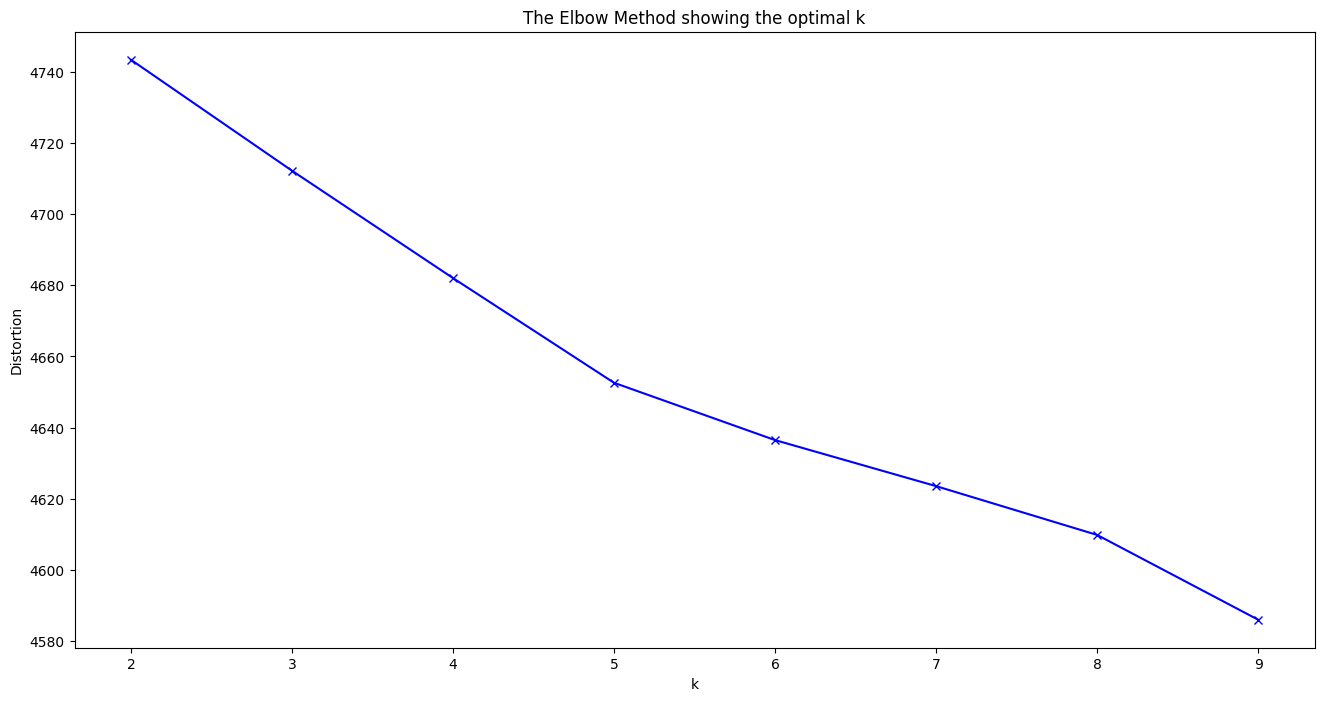

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#Berdasarkan hasil didapat n_cluster terbaik sebesar 9
kmeanModel = KMeans(n_clusters=9)
kmeanModel.fit(train_tfidf)

KMeans(n_clusters=9)

In [ ]:
TFIDF_train['k_means']=kmeanModel.predict(TFIDF_train)

In [ ]:
x_test=pd.DataFrame(x_test).reset_index()

In [ ]:
x_test.head()

index                                        Tweet_Clean
0   2794  tadi saya tlp cs mending kalo udh bisa tarik d...
1   2592  gimana mau sehat uang semuanya ada di rekening...
2   5356                           bsi bank sabar indonesia
3   2002  aku udah bisa narik alhamdulillah di atm terak...
4   4205                td sdh aku tarik lewat mandiri huhu

In [ ]:
x_test.shape

(1221, 2)

In [ ]:
TFIDF_test = TFIDF_vectorizer.transform(x_test['Tweet_Clean'])

In [ ]:
TFIDF_test=pd.DataFrame(TFIDF_test.toarray(),columns=TFIDF_vectorizer.get_feature_names_out())
TFIDF_test.head()

aaaa  aaaaahhh  aal  aamiin  abal  abang  abangnya  abc  abi  abisnya  ...  \
0   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   
1   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   
2   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   
3   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   
4   0.0       0.0  0.0     0.0   0.0    0.0       0.0  0.0  0.0      0.0  ...   

   zioni  ziva  zolim  zona  zonaba  zonauang  zonk  zuma  zzz  zzzz  
0    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  
1    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  
2    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  
3    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  
4    0.0   0.0    0.0   0.0     0.0       0.0   0.0   0.0  0.0   0.0  

[5 rows x 7753 columns]

In [ ]:
x_test['k_means']=kmeanModel.predict(TFIDF_test)
x_test.head()

index                                        Tweet_Clean  k_means
0   2794  tadi saya tlp cs mending kalo udh bisa tarik d...        8
1   2592  gimana mau sehat uang semuanya ada di rekening...        4
2   5356                           bsi bank sabar indonesia        6
3   2002  aku udah bisa narik alhamdulillah di atm terak...        4
4   4205                td sdh aku tarik lewat mandiri huhu        4

Text(0.5, 1.0, 'Distribution of Data Points Across Clusters')

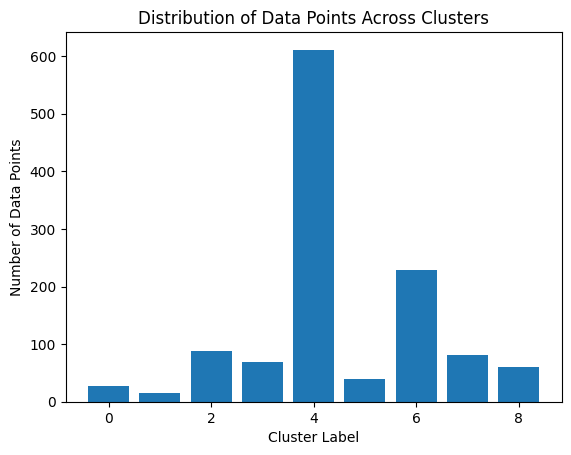

In [ ]:
cluster = x_test['k_means'].value_counts()
plt.bar(cluster.index, cluster.values)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')

- Klaster 4 memiliki jumlah poin data tertinggi, sekitar 600 poin.
- Klaster 6 memiliki jumlah poin data tertinggi kedua, sekitar 250 poin.
- Klaster 1, 2, 3, 7, dan 8 memiliki jumlah poin data sedang, masing-masing memiliki antara 50 hingga 150 poin.
- Klaster 0 dan 5 memiliki jumlah poin data paling sedikit, masing-masing kurang dari 50 poin.

Ada ketidakseimbangan signifikan dalam jumlah poin data di antara klaster-klaster tersebut, dengan Klaster 4 menjadi yang paling dominan. Hal ini menunjukkan bahwa Klaster 4 mungkin menangkap sebagian besar variansi data atau ada masalah dengan algoritma pengelompokan yang menyebabkan ketidakseimbangan ini.


### Topic Prediction

#### Build Dictionary

In [ ]:
def dictionary(texts):
  dictionary = Dictionary(texts)
  dictionary.filter_extremes(no_below = 5, no_above = 0.5)

  return dictionary

In [ ]:
x_train_processed = [doc.split() for doc in x_train_processed]

In [ ]:
dictionary = dictionary(x_train_processed)

In [ ]:
for key, value in dictionary.items():
  print(f"Key: {key}, Value: {value}")

Key: 0, Value: aks
Key: 1, Value: bisanya
Key: 2, Value: emang
Key: 3, Value: ewallet
Key: 4, Value: kak
Key: 5, Value: mbank
Key: 6, Value: pake
Key: 7, Value: saranku
Key: 8, Value: setauku
Key: 9, Value: topup
Key: 10, Value: wifi
Key: 11, Value: astaghfirullah
Key: 12, Value: bsi
Key: 13, Value: error
Key: 14, Value: jam
Key: 15, Value: wib
Key: 16, Value: bank
Key: 17, Value: hack
Key: 18, Value: kena
Key: 19, Value: otp
Key: 20, Value: sistem
Key: 21, Value: transaksi
Key: 22, Value: tuh
Key: 23, Value: ya
Key: 24, Value: apk
Key: 25, Value: kemana
Key: 26, Value: kepotong
Key: 27, Value: masuk
Key: 28, Value: min
Key: 29, Value: mutasi
Key: 30, Value: nanya
Key: 31, Value: reken
Key: 32, Value: rekeningnya
Key: 33, Value: uangnya
Key: 34, Value: atmnya
Key: 35, Value: beroperasi
Key: 36, Value: pulih
Key: 37, Value: instal
Key: 38, Value: kek
Key: 39, Value: laptop
Key: 40, Value: ulang
Key: 41, Value: aman
Key: 42, Value: barusan
Key: 43, Value: biar
Key: 44, Value: bro
Key: 45

#### Build Corpus

##### Bag of Words

In [ ]:
def corpus(dictionary, texts):
  corpus = [dictionary.doc2bow(text) for text in texts]

  return corpus

In [ ]:
corpus_bow = corpus(dictionary, x_train_processed)

In [ ]:
for doc in corpus_bow:
  print(doc)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
[(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
[(2, 2), (12, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]
[(12, 1), (21, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 2)]
[(4, 1), (34, 1), (35, 1), (36, 1)]
[(37, 1), (38, 1), (39, 1), (40, 1)]
[(5, 1), (14, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)]
[(14, 1), (59, 1), (60, 1), (61, 1)]
[(16, 1), (62, 1), (63, 1)]
[(64, 1), (65, 1)]
[(66, 1), (67, 1), (68, 1), (69, 1)]
[(13, 1), (16, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)]
[(76, 1), (77, 1), (78, 1)]
[(4, 1), (22, 1), (23, 1), (70, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1)]
[(4, 1), (23, 1), (81, 1), (88, 1)]
[(12, 1), (89, 1), (90, 1)]


In [ ]:
for doc_id, doc in enumerate(corpus_bow):
    print(f"\nDocument {doc_id + 1}:")
    for word_id, count in doc:
      word = dictionary.get(word_id, "<UNKNOWN>")
      print(f"  - Word: {word} (ID: {word_id}) - Count: {count}")

Streaming output truncated to the last 5000 lines.
  - Word: sistem (ID: 20) - Count: 1
  - Word: laporan (ID: 53) - Count: 1
  - Word: gitu (ID: 88) - Count: 1
  - Word: aja (ID: 116) - Count: 1
  - Word: nya (ID: 126) - Count: 2
  - Word: uang (ID: 132) - Count: 1
  - Word: ma (ID: 229) - Count: 1
  - Word: hilang (ID: 283) - Count: 1
  - Word: perbaikan (ID: 313) - Count: 1
  - Word: anak (ID: 317) - Count: 1

Document 4331:
  - Word: belom (ID: 105) - Count: 1
  - Word: yg (ID: 144) - Count: 1
  - Word: minsi (ID: 1283) - Count: 1

Document 4332:
  - Word: bsi (ID: 12) - Count: 1
  - Word: bank (ID: 16) - Count: 3
  - Word: saham (ID: 142) - Count: 1
  - Word: mengalami (ID: 175) - Count: 1
  - Word: perbankan (ID: 212) - Count: 1
  - Word: kejadian (ID: 376) - Count: 1
  - Word: jual (ID: 447) - Count: 1
  - Word: pasca (ID: 557) - Count: 1
  - Word: mitigasi (ID: 858) - Count: 1
  - Word: hacker (ID: 990) - Count: 1
  - Word: negosiasi (ID: 1244) - Count: 1
  - Word: kegagalan (I

##### Additional TFIDF from the BoW Corpus

In [ ]:
def tfidf(corpus):
  tfidf = models.TfidfModel(corpus)
  corpus_tfidf = tfidf[corpus]

  return corpus_tfidf

In [ ]:
corpus_tfidf = tfidf(corpus_bow)

In [ ]:
for doc in corpus_tfidf:
  print(doc)

[(0, 0.26091633253440555), (1, 0.3334215536525064), (2, 0.23136702148778618), (3, 0.32581591012856265), (4, 0.2926082856590528), (5, 0.19988137415242496), (6, 0.1879572626493682), (7, 0.38168170699956183), (8, 0.3652959923874925), (9, 0.28633582786963285), (10, 0.37290163591143627)]
[(11, 0.626817237619531), (12, 0.11249833078241411), (13, 0.2941522062060642), (14, 0.4091400969114412), (15, 0.5835436032359471)]
[(2, 0.5862571519750925), (12, 0.08479224587965213), (16, 0.0984004812410552), (17, 0.38660180111429004), (18, 0.28977159298447286), (19, 0.4003887522515015), (20, 0.2673901554800863), (21, 0.21243261393611623), (22, 0.32501216457536614), (23, 0.15307668862312013)]
[(12, 0.06300917888539531), (21, 0.15785882817151514), (23, 0.11375139738989663), (24, 0.3221710045542234), (25, 0.2975291697087737), (26, 0.26632436930794756), (27, 0.17970580518877038), (28, 0.1285401386601781), (29, 0.2562853892267466), (30, 0.3139048710293961), (31, 0.3638942457703619), (32, 0.3319477654131574), (

In [ ]:
for doc_id, doc in enumerate(corpus_tfidf):
    print(f"\nDocument {doc_id + 1}:")
    for word_id, weight in doc:
      word = dictionary.get(word_id, "<UNKNOWN>")
      print(f"  - Word: {word} (ID: {word_id}) - Weight: {weight}")

Streaming output truncated to the last 5000 lines.
  - Word: sistem (ID: 20) - Weight: 0.2560788627467461
  - Word: laporan (ID: 53) - Weight: 0.36448508910121274
  - Word: gitu (ID: 88) - Weight: 0.2923483365301458
  - Word: aja (ID: 116) - Weight: 0.15394822255673182
  - Word: nya (ID: 126) - Weight: 0.3485382599220718
  - Word: uang (ID: 132) - Weight: 0.22182046644816059
  - Word: ma (ID: 229) - Weight: 0.2963558056031862
  - Word: hilang (ID: 283) - Weight: 0.35188494158939226
  - Word: perbaikan (ID: 313) - Weight: 0.3799064233214335
  - Word: anak (ID: 317) - Weight: 0.37331958660266956

Document 4331:
  - Word: belom (ID: 105) - Weight: 0.5186302259821983
  - Word: yg (ID: 144) - Weight: 0.2688676962673471
  - Word: minsi (ID: 1283) - Weight: 0.811623589234285

Document 4332:
  - Word: bsi (ID: 12) - Weight: 0.06154524763015921
  - Word: bank (ID: 16) - Weight: 0.21426777609487319
  - Word: saham (ID: 142) - Weight: 0.2996176374794073
  - Word: mengalami (ID: 175) - Weight: 0.3

#### Model

In [ ]:
def coherence_score(model, texts, dictionary):
    coherence_model = CoherenceModel(model = model,
                                         texts = texts,
                                         dictionary = dictionary,
                                         coherence='c_v')
    coherence_lda = coherence_model.get_coherence()

    return coherence_lda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def model_topics(model):
  topics = model.show_topics(num_words = 10, formatted = True)

  for topic_num, topic in topics:
    print(f"Topic {topic_num}:")

    words = [word.split('*')[1].strip().replace('"', '') for word in topic.split('+')]
    weights = [word.split('*')[0].strip().replace('"', '') for word in topic.split('+')]
    topic_words_weights = [f"{words[i]}: {weights[i]}" for i in range(len(words))]
    print("\n".join(topic_words_weights))

    print()

In [ ]:
list_colors = ["#FF69B4", "#CD5C5C", "#ADD8E6", "#90EE90", "#FFE4E1", "#9ACD32", "#C0C0C0", "#F0E68C", "#E6E6FA"]

wc = WordCloud(
      background_color = "white",
      max_words = 15,
      max_font_size = 300,
      prefer_horizontal = 1.0,
      color_func=lambda *args, **kwargs: list_colors[i],
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Test Data Preparation

In [ ]:
x_test_stripped = [sample.strip() for sample in x_test]

x_test_unidecoded = [unidecode.unidecode(sample) for sample in x_test_stripped]

x_test_tokenized = [word_tokenize(sample) for sample in x_test_stripped]

x_test_tokenized

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['tadi',
  'saya',
  'tlp',
  'cs',
  'mending',
  'kalo',
  'udh',
  'bisa',
  'tarik',
  'dana',
  'aja',
  'semuanya',
  'kak',
  'karna',
  'nutup',
  'ajakan',
  'banyak',
  'syarat',
  'dan',
  'dikenai',
  'dana',
  'penutupan',
  'ini',
  'bank',
  'gak',
  'amanah',
  'mending',
  'kita',
  'pergi',
  'aja',
  'dia',
  'aja',
  'gak',
  'hargai',
  'kita',
  'sebagai',
  'nasabah'],
 ['gimana',
  'mau',
  'sehat',
  'uang',
  'semuanya',
  'ada',
  'di',
  'rekening',
  'dan',
  'sampai',
  'sekarang',
  'uang',
  'kita',
  'belum',
  'bisa',
  'diapa',
  'apain',
  'transaksi',
  'di',
  'bsi',
  'mobile',
  'hanya',
  'bisa',
  'cek',
  'saldo',
  'doang',
  'selebihnya',
  'gk',
  'bisa'],
 ['bsi', 'bank', 'sabar', 'indonesia'],
 ['aku',
  'udah',
  'bisa',
  'narik',
  'alhamdulillah',
  'di',
  'atm',
  'terakhir',
  'coba',
  'ebanking',
  'tadi',
  'pagi',
  'masih',
  'error'],
 ['td', 'sdh', 'aku', 'tarik', 'lewat', 'mandiri', 'huhu'],
 ['imbas',
  'dari',
  'peretas

In [ ]:
x_test_filtered = [[word for word in sample if word not in stop_words] for sample in x_test_tokenized]
x_test_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['tlp',
  'cs',
  'mending',
  'kalo',
  'udh',
  'tarik',
  'dana',
  'aja',
  'kak',
  'karna',
  'nutup',
  'ajakan',
  'syarat',
  'dikenai',
  'dana',
  'penutupan',
  'bank',
  'gak',
  'amanah',
  'mending',
  'pergi',
  'aja',
  'aja',
  'gak',
  'hargai',
  'nasabah'],
 ['gimana',
  'sehat',
  'uang',
  'rekening',
  'uang',
  'diapa',
  'apain',
  'transaksi',
  'bsi',
  'mobile',
  'cek',
  'saldo',
  'doang',
  'selebihnya',
  'gk'],
 ['bsi', 'bank', 'sabar', 'indonesia'],
 ['udah',
  'narik',
  'alhamdulillah',
  'atm',
  'coba',
  'ebanking',
  'pagi',
  'error'],
 ['td', 'sdh', 'tarik', 'mandiri', 'huhu'],
 ['imbas',
  'peretasan',
  'menyebabkan',
  'error',
  'nya',
  'layanan',
  'transaksi',
  'bank',
  'syariah',
  'indonesia',
  'bsi',
  'atm',
  'bsi',
  'mobile',
  'pekan',
  'komisi',
  'vi',
  'dpr',
  'direksi',
  'bsi',
  'dicopot'],
 ['min',
  'tolong',
  'dibales',
  'aktivasi',
  'bsi',
  'mobile',
  'buka',
  'rekening',
  'bsi',
  'mobile',
  'buku',
  

In [ ]:
x_test_stemmed = [[PorterStemmer().stem(word) for word in sample] for sample in x_test_filtered]
x_test_stemmed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['tlp',
  'cs',
  'mend',
  'kalo',
  'udh',
  'tarik',
  'dana',
  'aja',
  'kak',
  'karna',
  'nutup',
  'ajakan',
  'syarat',
  'dikenai',
  'dana',
  'penutupan',
  'bank',
  'gak',
  'amanah',
  'mend',
  'pergi',
  'aja',
  'aja',
  'gak',
  'hargai',
  'nasabah'],
 ['gimana',
  'sehat',
  'uang',
  'reken',
  'uang',
  'diapa',
  'apain',
  'transaksi',
  'bsi',
  'mobil',
  'cek',
  'saldo',
  'doang',
  'selebihnya',
  'gk'],
 ['bsi', 'bank', 'sabar', 'indonesia'],
 ['udah', 'narik', 'alhamdulillah', 'atm', 'coba', 'ebank', 'pagi', 'error'],
 ['td', 'sdh', 'tarik', 'mandiri', 'huhu'],
 ['imba',
  'peretasan',
  'menyebabkan',
  'error',
  'nya',
  'layanan',
  'transaksi',
  'bank',
  'syariah',
  'indonesia',
  'bsi',
  'atm',
  'bsi',
  'mobil',
  'pekan',
  'komisi',
  'vi',
  'dpr',
  'direksi',
  'bsi',
  'dicopot'],
 ['min',
  'tolong',
  'dibal',
  'aktivasi',
  'bsi',
  'mobil',
  'buka',
  'reken',
  'bsi',
  'mobil',
  'buku',
  'tabungan',
  'kartu',
  'atm',
  'g

In [ ]:
x_test_lemmatized = [[WordNetLemmatizer().lemmatize(word, pos='v') for word in sample] for sample in x_test_stemmed]
x_test_lemmatized

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['tlp',
  'cs',
  'mend',
  'kalo',
  'udh',
  'tarik',
  'dana',
  'aja',
  'kak',
  'karna',
  'nutup',
  'ajakan',
  'syarat',
  'dikenai',
  'dana',
  'penutupan',
  'bank',
  'gak',
  'amanah',
  'mend',
  'pergi',
  'aja',
  'aja',
  'gak',
  'hargai',
  'nasabah'],
 ['gimana',
  'sehat',
  'uang',
  'reken',
  'uang',
  'diapa',
  'apain',
  'transaksi',
  'bsi',
  'mobil',
  'cek',
  'saldo',
  'doang',
  'selebihnya',
  'gk'],
 ['bsi', 'bank', 'sabar', 'indonesia'],
 ['udah', 'narik', 'alhamdulillah', 'atm', 'coba', 'ebank', 'pagi', 'error'],
 ['td', 'sdh', 'tarik', 'mandiri', 'huhu'],
 ['imba',
  'peretasan',
  'menyebabkan',
  'error',
  'nya',
  'layanan',
  'transaksi',
  'bank',
  'syariah',
  'indonesia',
  'bsi',
  'atm',
  'bsi',
  'mobil',
  'pekan',
  'komisi',
  'vi',
  'dpr',
  'direksi',
  'bsi',
  'dicopot'],
 ['min',
  'tolong',
  'dibal',
  'aktivasi',
  'bsi',
  'mobil',
  'buka',
  'reken',
  'bsi',
  'mobil',
  'buku',
  'tabungan',
  'kartu',
  'atm',
  'g

In [ ]:
x_test_processed = [' '.join(sample) for sample in x_test_lemmatized]

x_test_processed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['tlp cs mend kalo udh tarik dana aja kak karna nutup ajakan syarat dikenai dana penutupan bank gak amanah mend pergi aja aja gak hargai nasabah',
 'gimana sehat uang reken uang diapa apain transaksi bsi mobil cek saldo doang selebihnya gk',
 'bsi bank sabar indonesia',
 'udah narik alhamdulillah atm coba ebank pagi error',
 'td sdh tarik mandiri huhu',
 'imba peretasan menyebabkan error nya layanan transaksi bank syariah indonesia bsi atm bsi mobil pekan komisi vi dpr direksi bsi dicopot',
 'min tolong dibal aktivasi bsi mobil buka reken bsi mobil buku tabungan kartu atm gimana ya min bawa ktp',
 'bisikin banknya btw emang ngecilin angsuran perpanjang bsi tp bilang nggak ga programnya',
 'ambil mesin atm gak kak kalo ambil teller gak kak',
 'i still have bucket on my first bank acc tp ttp ketar ketir ngeliat pemulihannya bsi if thi be fail then it will be chaotic that my entir life save there ga tau ya yg dibalik layar tp salut respek sm timnya bsi smg ga kejadian jd pembelajaran',
 '

In [ ]:
x_test_processed = [doc.split() for doc in x_test_processed]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus_test_bow = corpus(dictionary, x_test_processed)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus_test_tfidf = tfidf(corpus_test_bow)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### LDA

In [ ]:
def model_lda(dictionary, corpus, num_topic, alpha, eta):
    lda_model =  gensim.models.LdaMulticore(corpus,
                                   num_topics = 9,
                                   id2word = dictionary,
                                   passes = 15,
                                   workers = 2,
                                   alpha = 0.6,
                                   eta = eta)
    return lda_model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_base_model = model_lda(dictionary, corpus_bow, 9, 0.6, 0.6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_base_coherence = coherence_score(lda_base_model, x_train_processed, dictionary)
lda_base_coherence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.41081720711259995

In [ ]:
model_topics(lda_base_model)

Topic 0:
nasabah: 0.047
data: 0.045
bsi: 0.035
sistem: 0.034
bank: 0.032
yg: 0.029
aman: 0.023
indonesia: 0.021
ransomwar: 0.017
amp: 0.016

Topic 1:
udah: 0.085
gak: 0.077
pake: 0.027
ya: 0.027
bank: 0.027
bsi: 0.026
nya: 0.019
tolong: 0.018
kemarin: 0.016
aja: 0.013

Topic 2:
saldo: 0.051
min: 0.043
masuk: 0.030
bsi: 0.029
ya: 0.029
tf: 0.023
reken: 0.022
dana: 0.020
bank: 0.018
gagal: 0.017

Topic 3:
ga: 0.073
yg: 0.043
aja: 0.033
uang: 0.032
kalo: 0.031
ya: 0.022
sih: 0.016
gini: 0.015
dah: 0.015
saldo: 0.013

Topic 4:
bank: 0.171
bsi: 0.103
syariah: 0.048
mobil: 0.038
aceh: 0.026
bca: 0.011
atm: 0.011
layanan: 0.011
yg: 0.011
cash: 0.009

Topic 5:
atm: 0.053
tarik: 0.038
bsi: 0.034
udh: 0.030
tunai: 0.025
blm: 0.020
klo: 0.017
jam: 0.015
bang: 0.014
alhamdulillah: 0.014

Topic 6:
nya: 0.066
min: 0.041
samp: 0.033
mbank: 0.028
gabisa: 0.027
gimana: 0.026
nih: 0.024
up: 0.024
top: 0.022
error: 0.022

Topic 7:
bsi: 0.106
transfer: 0.040
bank: 0.031
transaksi: 0.027
pakai: 0.023
mandi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


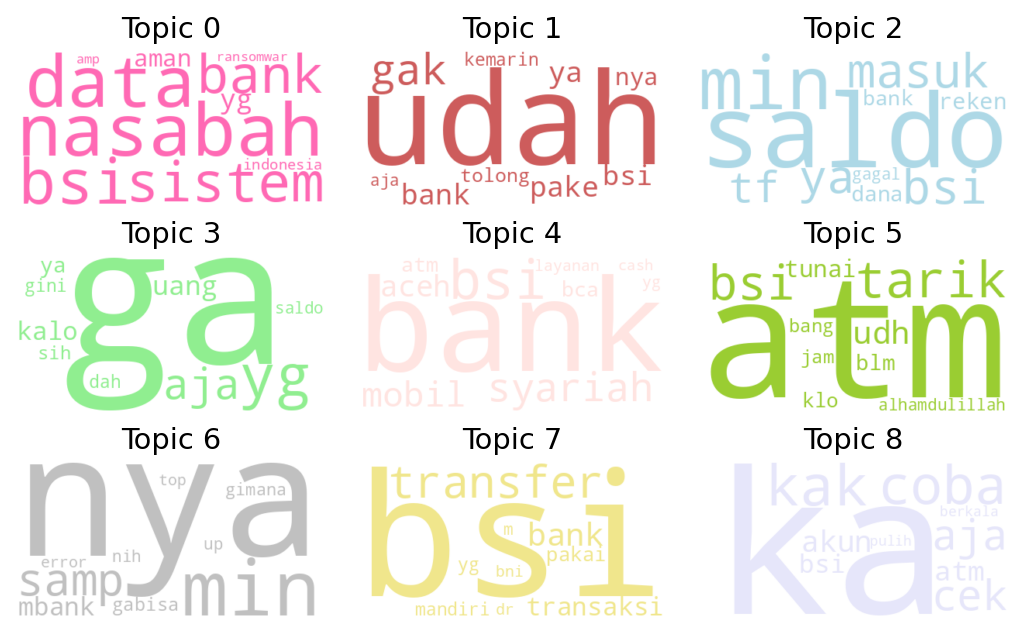

In [ ]:
topics_lda_base = lda_base_model.show_topics(formatted = False)

fig, axes = plt.subplots(3, 3, figsize = (8, 5),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topics_lda_base[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 13))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

- Topic 0 : Data nasabah dan sistem yang digunakan oleh bank.
- Topic 1 : Pengalaman atau keluhan pengguna tentang layanan bank yang sudah digunakan.
- Topic 2 : Terkait saldo rekening bank termasuk masalah transfer dana.
- Topic 3 : Berisi percakapan atau komentar umum pengguna terkait pengalaman sehari-hari dengan bank.
- Topic 4 : membahas layanan bank, termasuk layanan keuangan lainnya yang ditawarkan.
- Topic 5 :  Transaksi penarikan tunai di ATM pada bank BSI.
- Topic 6 : Membahas kendala atau masalah teknis yang dialami pengguna, seperti error pada aplikasi mbanking.
- Topic 7 : Transaksi transfer antar bank, termasuk bank BSI, BNI, dan Mandiri.
- Topic 8 : Berisi percakapan atau permintaan bantuan, seperti terkait pemulihan akun atau masalah dengan ATM

In [ ]:
visual_lda_base = pyLDAvis.gensim.prepare(topic_model = lda_base_model,
                                          corpus = corpus_test_bow,
                                          dictionary = dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(visual_lda_base)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Berdasarkan visualisasi di atas dapat disimpulkan banhwa :

- Topik 1, 6, dan 7 berkelompok rapat, menunjukkan bahwa mereka memiliki kesamaan dalam distribusi kata.
- Topik 2, 3, 4, 5, 8, dan 9 lebih tersebar.

In [ ]:
lda_base_tfidf_model = model_lda(dictionary, corpus_tfidf, 9, 0.6, 0.6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_base_tfidf_coherence = coherence_score(lda_base_tfidf_model, x_train_processed, dictionary)
lda_base_tfidf_coherence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.34177369234218513

In [ ]:
model_topics(lda_base_tfidf_model)

Topic 0:
data: 0.016
bsi: 0.013
syariah: 0.013
bank: 0.010
nasabah: 0.010
hoax: 0.009
indonesia: 0.008
parah: 0.008
gimana: 0.007
penipu: 0.006

Topic 1:
transfer: 0.016
min: 0.015
akun: 0.012
hati: 0.011
bsi: 0.010
kak: 0.010
up: 0.010
bank: 0.010
top: 0.009
masuk: 0.009

Topic 2:
aceh: 0.011
tolong: 0.010
bank: 0.009
banget: 0.008
bsi: 0.008
nggak: 0.008
ya: 0.008
udah: 0.007
yg: 0.007
nya: 0.006

Topic 3:
sistem: 0.013
bank: 0.011
bsi: 0.010
aja: 0.008
yg: 0.008
pembayaran: 0.007
orang: 0.006
min: 0.006
ya: 0.006
bi: 0.006

Topic 4:
blm: 0.017
nih: 0.015
bang: 0.010
cek: 0.009
samp: 0.009
kak: 0.008
top: 0.008
belom: 0.008
udh: 0.008
up: 0.008

Topic 5:
uang: 0.014
ga: 0.011
bsi: 0.010
bank: 0.010
min: 0.009
atm: 0.007
yg: 0.006
udah: 0.006
ya: 0.006
aman: 0.006

Topic 6:
ka: 0.033
atm: 0.020
coba: 0.017
mobil: 0.012
pulih: 0.012
cek: 0.011
urgent: 0.011
berkala: 0.011
terdekat: 0.011
aja: 0.010

Topic 7:
bsi: 0.014
bank: 0.013
gak: 0.008
lockbit: 0.007
ya: 0.007
ga: 0.006
bri: 0.00

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


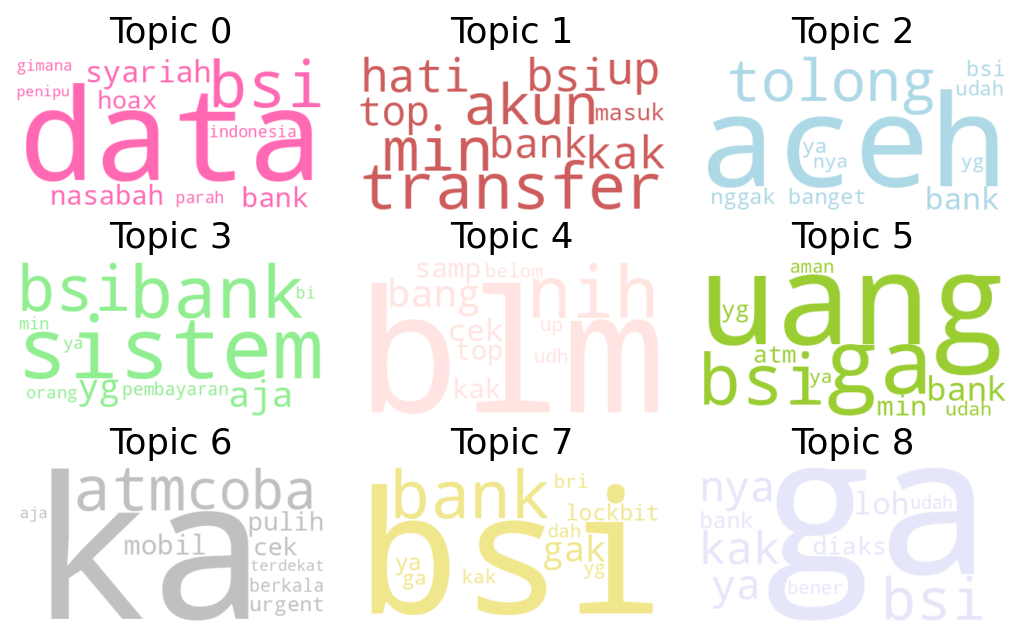

In [ ]:
topics_lda_tfidf_base = lda_base_tfidf_model.show_topics(formatted = False)

fig, axes = plt.subplots(3, 3, figsize = (8, 5),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topics_lda_tfidf_base[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 16))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

- Topic 0 : Membahas tentang data nasabah di BSI, termasuk isu-isu terkait penipuan atau hoaks yang mungkin terjadi.
- Topic 1 : Berhubungan dengan masalah transfer dan akun bank, serta peringatan untuk berhati-hati dalam melakukan transaksi.
- Topic 2 : Berfokus pada permasalahan khusus yang terjadi di Aceh terkait dengan layanan bank BSI.
- Topic 3 : Membahas tentang sistem pembayaran yang digunakan oleh BSI dan masalah yang mungkin terjadi
- Topic 4 : Terkait dengan keluhan bahwa sesuatu belum selesai atau terverifikasi.
- Topic 5 : Berhubungan dengan masalah keuangan pengguna, seperti penarikan uang tunai.
- Topic 6 : Mencakup masalah yang mendesak terkait ATM, termasuk usaha untuk memulihkan akses atau melakukan pengecekan.
- Topic 7 : Berfokus pada isu keamanan dan potensi serangan siber seperti LockBit yang mungkin mempengaruhi bank.
- Topic 8 : Berkaitan dengan keluhan umum atau permintaan bantuan pengguna

In [ ]:
visual_lda_tfidf_base = pyLDAvis.gensim.prepare(topic_model = lda_base_tfidf_model,
                                          corpus = corpus_test_tfidf,
                                          dictionary = dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(visual_lda_tfidf_base)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Berdasarkan visualisasi di atas dapat disimpulkan banhwa :    
- Topik 4, 5, 6, 7, dan 9 berkelompok rapat, menunjukkan bahwa mereka memiliki kesamaan dalam distribusi kata.
- Topik 1, 2, 3, dan 8 lebih berbeda.

### Analisis Perbandingan Model

Topic Extraction yang saya gunakan adalah LDA (Latent Dirichlet Allocation) yaitu metode untuk menemukan topik-topik tersembunyi dalam kumpulan dokumen. Cara kerja LDA yaitu mengasumsikan setiap dokumen terdiri dari campuran beberapa topik, setiap topik didefinisikan sebagai distribusi probabilitas atas kata-kata. Dari hasil didapat bahwa untuk pemodelan menggunakan k-Means hanya dapat mendefine k clusternya saja namun untuk pemodelan topic extraction kita dapat melakukan analisis topik yang dibahas di setiap klusternya.